# Lesson3 系列データで分類・予測させてみよう（RNN, LSTM）

## 目次

- Section1 Checkクイズの解答
- Section2. 実装①
    - 2.0 データの用意
    - 2.1 モデル構築
    - 2.2 モデルの学習
    - 2.3 モデルによる予測
    - 2.4 モデルの可視化

## Section1 Checkクイズの解答

問題1: 2, 問題2: 3

## Section2 実装①

ここでは、以下のページのECGによる波形データセットECG5000をRNNで学習し、分類を行ってみましょう。

http://timeseriesclassification.com/description.php?Dataset=ECG5000

このデータセットは、ECGの計測値140時点分とその系列に対する分類（1～5）で1データとなっており、全体で5000データが含まれています。

### 2.0 データの用意

**ここで利用するデータセットはリポジトリに含まれていません。**

上記リンク先のページ中段にある "Download this dataset" をクリックの上、ご自身でダウンロードして頂くようお願い致します。

ダウンロードしたデータセットはdataフォルダ内に配置していただく必要があります。

データセットの配置が完了したら、まずは配置したデータセットの読み込みを行いましょう。

arffという形式で保存されているため、`scipy.io.loadarff`関数でロードします。

https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.arff.loadarff.html

In [3]:
%matplotlib inline

from scipy.io import arff
import numpy as np

dataset, meta = arff.loadarff('data/ECG5000_train.arff')

ds = np.asarray(dataset.tolist(), dtype=np.float32)
x_dataset = ds[:, :140]
y_dataset = np.asarray(ds[:,-1].tolist(), dtype=np.int8)-1

実際に表示してみて、様子を確認しておきましょう。

[0 0 0 0 0 0 0 0 0 0]


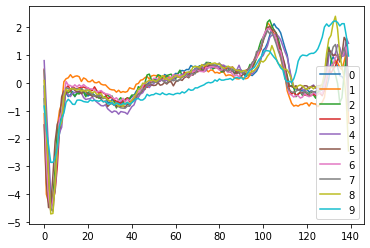

In [3]:
import matplotlib.pyplot as plt

N = 10
print(y_dataset[:N])
obj = plt.plot(x_dataset[:N].T)
plt.legend(obj, [str(n) for n in range(N)])

確かに、分類結果が異なる3,7番はt=100付近でピークを持たないことが見て取れます。

続いて、データセットを訓練用とテスト用に分割します。

In [8]:
# 訓練データとテストデータを分割（＋データの整形）

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

x_train, x_test, y_train, y_test = train_test_split(x_dataset[:,:,np.newaxis], to_categorical(y_dataset), test_size=0.2, random_state=42)

5


### 2.1 モデル構築

ここでは、先程紹介したSimpleRNNを使用してモデルを構築します。

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, SimpleRNN

hid_dim = 10

# SimpleRNNにDenseを接続し、分類
model = Sequential()

model.add(SimpleRNN(hid_dim, input_shape=x_train.shape[1:])) # input_shape=(系列長T, x_tの次元), output_shape=(units(=hid_dim),)
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 2.2 モデルの学習


In [6]:
model.fit(x_train, y_train, epochs=50, batch_size=100, verbose=2, validation_split=0.2)

Epoch 1/50
4/4 - 2s - loss: 1.9369 - accuracy: 0.0531 - val_loss: 1.9978 - val_accuracy: 0.0250
Epoch 2/50
4/4 - 0s - loss: 1.8764 - accuracy: 0.0562 - val_loss: 1.9422 - val_accuracy: 0.0250
Epoch 3/50
4/4 - 0s - loss: 1.8166 - accuracy: 0.0625 - val_loss: 1.8875 - val_accuracy: 0.0375
Epoch 4/50
4/4 - 0s - loss: 1.7588 - accuracy: 0.0750 - val_loss: 1.8338 - val_accuracy: 0.0500
Epoch 5/50
4/4 - 0s - loss: 1.7016 - accuracy: 0.1031 - val_loss: 1.7806 - val_accuracy: 0.0750
Epoch 6/50
4/4 - 0s - loss: 1.6457 - accuracy: 0.1344 - val_loss: 1.7277 - val_accuracy: 0.1125
Epoch 7/50
4/4 - 0s - loss: 1.5896 - accuracy: 0.1531 - val_loss: 1.6754 - val_accuracy: 0.1250
Epoch 8/50
4/4 - 0s - loss: 1.5340 - accuracy: 0.2000 - val_loss: 1.6225 - val_accuracy: 0.1250
Epoch 9/50
4/4 - 0s - loss: 1.4795 - accuracy: 0.2313 - val_loss: 1.5702 - val_accuracy: 0.1750
Epoch 10/50
4/4 - 0s - loss: 1.4259 - accuracy: 0.2750 - val_loss: 1.5193 - val_accuracy: 0.2125
Epoch 11/50
4/4 - 0s - loss: 1.3728 - a

### 2.3 モデルによる分類精度の評価

In [7]:
# 性能評価
score = model.evaluate(x_test, y_test, verbose=0)
print('test_loss:', score[0])
print('test_acc:', score[1])

test_loss: 0.6758354306221008
test_acc: 0.8500000238418579


### 2.4 モデルの可視化

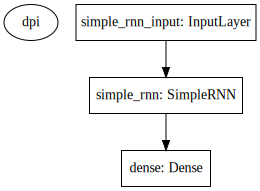

In [10]:
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model,dpi=None).create(prog='dot', format='svg'))